In [1]:
from ipynb.fs.full.Models import *
import matplotlib.patches as mpatches

In [2]:
weights = [[a, r] for a in [0., 1.] for r in [0., 1.]]
weights

[[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]

In [3]:
# Load results
SIR = pd.read_csv('params/SIR_models.csv', sep=',')
SIR = SIR[SIR.country=='Italy']

SIAR = pd.read_csv('params/SIAR_models.csv', sep=',')
SIAR = SIAR[SIAR.country=='Italy']

SEIAR = pd.read_csv('params/SEIAR_models.csv', sep=',')
SEIAR = SEIAR[SEIAR.country=='Italy']

In [4]:
SIR.columns

Index(['Unnamed: 0', 'oldAIC', 'AIC', 'cost', 'country', 'time', 'a', 'r',
       'beta', 'mu', 'I0', 'alpha', 't_lock', 'beta_lock'],
      dtype='object')

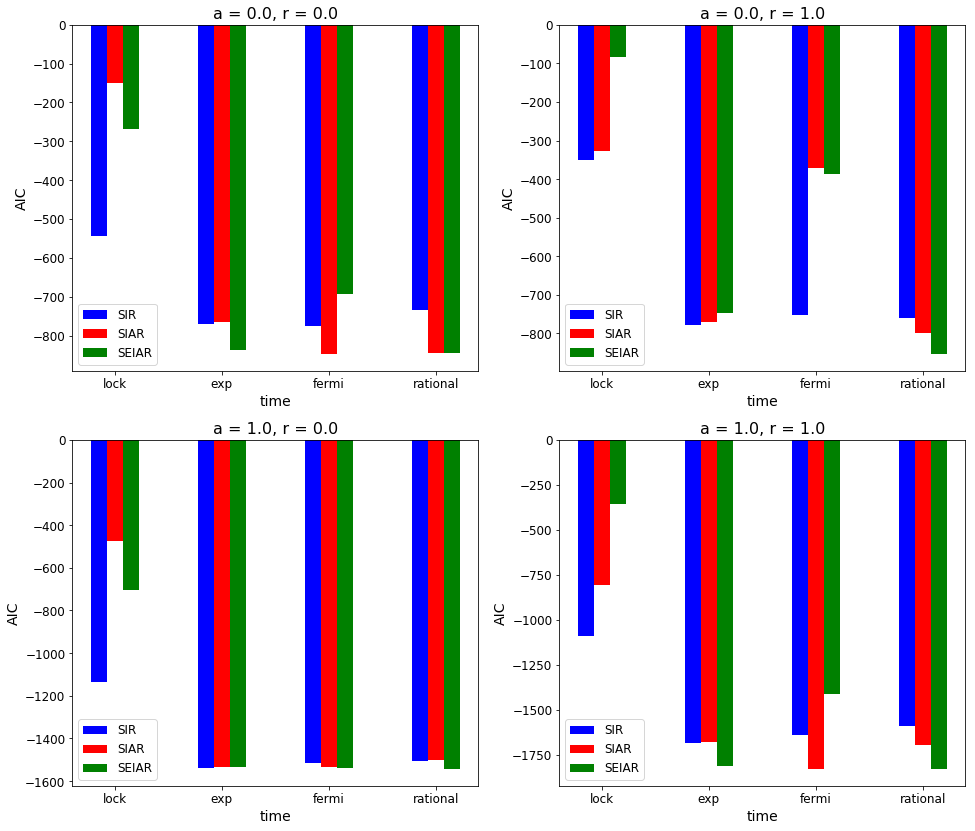

In [5]:
plt.figure(figsize=(16,14))

for i, weight in enumerate(weights):
    plt.subplot(2, 2, i+1)
    
    width = 0.15
    x = np.arange(len(times))
    
    for j, time in enumerate(times):
        plt.bar( j-width, SIR[ (SIR.a==weight[0]) & (SIR.r==weight[1]) & (SIR.time==time) ].oldAIC, width = width,
               color = 'blue')
        
        plt.bar( j, SIAR[ (SIAR.a==weight[0]) & (SIAR.r==weight[1]) & (SIAR.time==time) ].oldAIC, width = width,
               color = 'red')
        
        plt.bar( j+width, SEIAR[ (SEIAR.a==weight[0]) & (SEIAR.r==weight[1]) & (SEIAR.time==time) ].oldAIC, width = width,
               color = 'green')
        
        plt.legend(labels=['SIR', 'SIAR', 'SEIAR'], prop={'size': 12} )
    
    plt.xticks(x, labels=times)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.xlabel('time', size=14)
    plt.ylabel('AIC', size=14)
    plt.title('a = '+str(weight[0])+', r = '+str(weight[1]), size=16)
    
#plt.suptitle('AIC-A comparison', y=0.93, size=20)
plt.show()

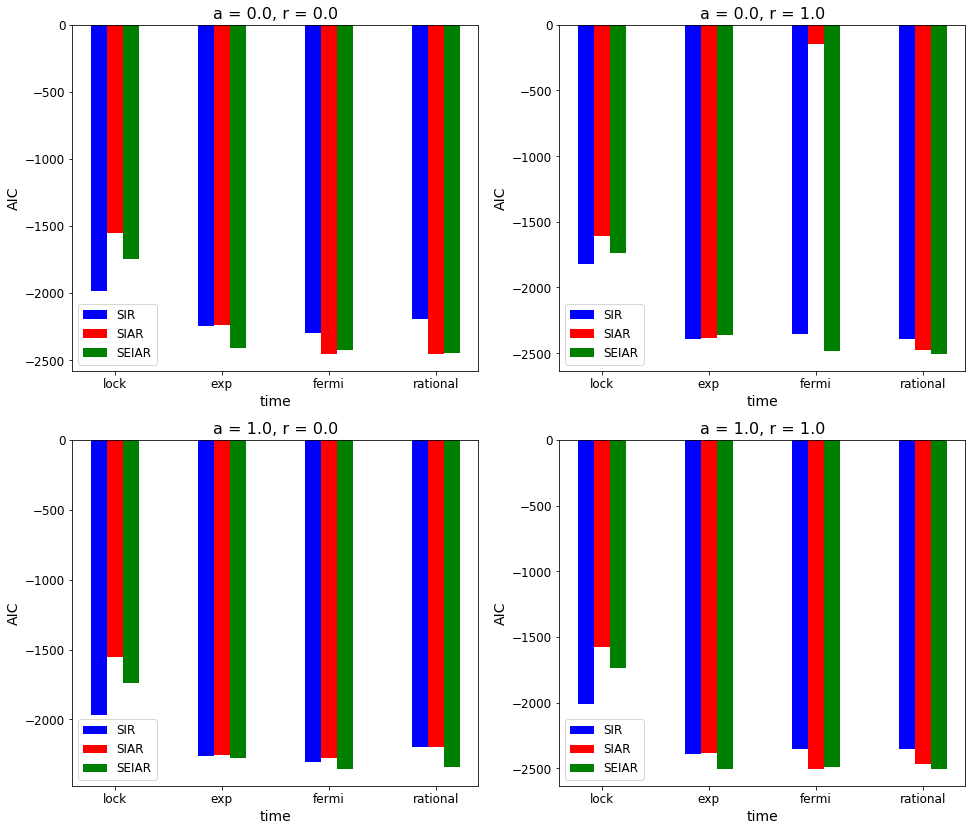

In [6]:
plt.figure(figsize=(16,14))

for i, weight in enumerate(weights):
    plt.subplot(2, 2, i+1)
    
    width = 0.15
    x = np.arange(len(times))
    
    for j, time in enumerate(times):
        plt.bar( j-width, SIR[ (SIR.a==weight[0]) & (SIR.r==weight[1]) & (SIR.time==time) ].AIC, width = width,
               color = 'blue')
        
        plt.bar( j, SIAR[ (SIAR.a==weight[0]) & (SIAR.r==weight[1]) & (SIAR.time==time) ].AIC, width = width,
               color = 'red')
        
        plt.bar( j+width, SEIAR[ (SEIAR.a==weight[0]) & (SEIAR.r==weight[1]) & (SEIAR.time==time) ].AIC, width = width,
               color = 'green')
        
        plt.legend(labels=['SIR', 'SIAR', 'SEIAR'], prop={'size': 12} )
    
    plt.xticks(x, labels=times)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.xlabel('time', size=14)
    plt.ylabel('AIC', size=14)
    plt.title('a = '+str(weight[0])+', r = '+str(weight[1]), size=16)
    
#plt.suptitle('AIC-B comparison', y=0.93, size=20)
plt.show()

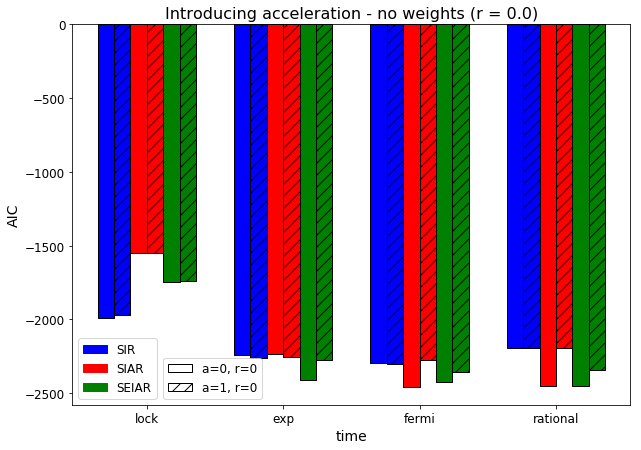

In [7]:
plt.figure(figsize=(10,7))
    
width = 0.12
x = np.arange(len(times)) - width/2
    
for j, time in enumerate(times):
    plt.bar( j-3*width, SIR[ (SIR.a==0.0) & (SIR.r==0.0) & (SIR.time==time) ].AIC, width = width,
               color = 'blue', edgecolor = 'black')
    plt.bar( j-width, SIAR[ (SIAR.a==0.0) & (SIAR.r==0.0) & (SIAR.time==time) ].AIC, width = width,
               color = 'red', edgecolor = 'black')
    plt.bar( j+width, SEIAR[ (SEIAR.a==0.0) & (SEIAR.r==0.0) & (SEIAR.time==time) ].AIC, width = width,
               color = 'green', edgecolor = 'black')
    
    plt.bar( j-2*width, SIR[ (SIR.a==1.0) & (SIR.r==0.0) & (SIR.time==time) ].AIC, width = width,
               color = 'blue', edgecolor = 'black', hatch='//')
    plt.bar( j, SIAR[ (SIAR.a==1.0) & (SIAR.r==0.0) & (SIAR.time==time) ].AIC, width = width,
               color = 'red', edgecolor = 'black', hatch='//')
    plt.bar( j+2*width, SEIAR[ (SEIAR.a==1.0) & (SEIAR.r==0.0) & (SEIAR.time==time) ].AIC, width = width,
               color = 'green', edgecolor = 'black', hatch='//')
        
    #plt.legend(labels=['SIR', 'SIAR', 'SEIAR'], prop={'size': 12} )

blue_patch = mpatches.Patch(color='blue', label='SIR')
red_patch = mpatches.Patch(color='red', label='SIAR')
green_patch = mpatches.Patch(color='green', label='SEIAR') 
first_legend = plt.legend(handles=[blue_patch, red_patch, green_patch], loc='lower left', prop={'size': 12} )
ax = plt.gca().add_artist(first_legend)

hatches = ['', '//']

handl = []
handl.append(mpatches.Patch(fc='white', ec='black', label='a=0, r=0', hatch=hatches[0]))
handl.append(mpatches.Patch(fc='white', ec='black', label='a=1, r=0', hatch=hatches[1]))
plt.legend(bbox_to_anchor=(0.35,0.14), handles=handl, prop={'size': 12})
    
plt.xticks(x, labels=times)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('time', size=14)
plt.ylabel('AIC', size=14)
plt.title('Introducing acceleration - no weights (r = 0.0)', size=16)
    
plt.show()

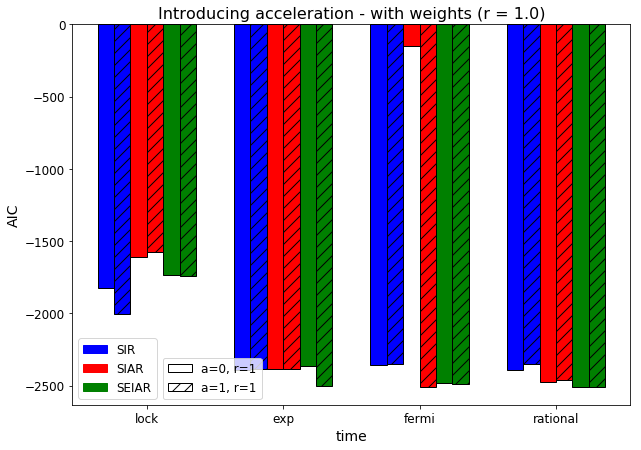

In [8]:
plt.figure(figsize=(10,7))
    
width = 0.12
x = np.arange(len(times)) - width/2
    
for j, time in enumerate(times):
    plt.bar( j-3*width, SIR[ (SIR.a==0.0) & (SIR.r==1.0) & (SIR.time==time) ].AIC, width = width,
               color = 'blue', edgecolor = 'black')
    plt.bar( j-width, SIAR[ (SIAR.a==0.0) & (SIAR.r==1.0) & (SIAR.time==time) ].AIC, width = width,
               color = 'red', edgecolor = 'black')
    plt.bar( j+width, SEIAR[ (SEIAR.a==0.0) & (SEIAR.r==1.0) & (SEIAR.time==time) ].AIC, width = width,
               color = 'green', edgecolor = 'black')
    
    plt.bar( j-2*width, SIR[ (SIR.a==1.0) & (SIR.r==1.0) & (SIR.time==time) ].AIC, width = width,
               color = 'blue', edgecolor = 'black', hatch='//')
    plt.bar( j, SIAR[ (SIAR.a==1.0) & (SIAR.r==1.0) & (SIAR.time==time) ].AIC, width = width,
               color = 'red', edgecolor = 'black', hatch='//')
    plt.bar( j+2*width, SEIAR[ (SEIAR.a==1.0) & (SEIAR.r==1.0) & (SEIAR.time==time) ].AIC, width = width,
               color = 'green', edgecolor = 'black', hatch='//')
        
    #plt.legend(labels=['SIR', 'SIAR', 'SEIAR'], prop={'size': 12} )

blue_patch = mpatches.Patch(color='blue', label='SIR')
red_patch = mpatches.Patch(color='red', label='SIAR')
green_patch = mpatches.Patch(color='green', label='SEIAR') 
first_legend = plt.legend(handles=[blue_patch, red_patch, green_patch], loc='lower left', prop={'size': 12} )
ax = plt.gca().add_artist(first_legend)

hatches = ['', '//']

handl = []
handl.append(mpatches.Patch(fc='white', ec='black', label='a=0, r=1', hatch=hatches[0]))
handl.append(mpatches.Patch(fc='white', ec='black', label='a=1, r=1', hatch=hatches[1]))
plt.legend(bbox_to_anchor=(0.35,0.14), handles=handl, prop={'size': 12})    


plt.xticks(x, labels=times)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('time', size=14)
plt.ylabel('AIC', size=14)
plt.title('Introducing acceleration - with weights (r = 1.0)', size=16)
    
plt.show()

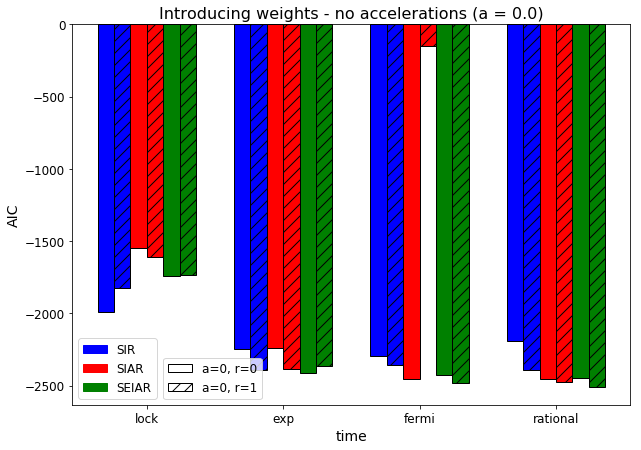

In [9]:
plt.figure(figsize=(10,7))
    
width = 0.12
x = np.arange(len(times)) - width/2
    
for j, time in enumerate(times):
    plt.bar( j-3*width, SIR[ (SIR.a==0.0) & (SIR.r==0.0) & (SIR.time==time) ].AIC, width = width,
               color = 'blue', edgecolor = 'black')
    plt.bar( j-width, SIAR[ (SIAR.a==0.0) & (SIAR.r==0.0) & (SIAR.time==time) ].AIC, width = width,
               color = 'red', edgecolor = 'black')
    plt.bar( j+width, SEIAR[ (SEIAR.a==0.0) & (SEIAR.r==0.0) & (SEIAR.time==time) ].AIC, width = width,
               color = 'green', edgecolor = 'black')
    
    plt.bar( j-2*width, SIR[ (SIR.a==0.0) & (SIR.r==1.0) & (SIR.time==time) ].AIC, width = width,
               color = 'blue', edgecolor = 'black', hatch='//')
    plt.bar( j, SIAR[ (SIAR.a==0.0) & (SIAR.r==1.0) & (SIAR.time==time) ].AIC, width = width,
               color = 'red', edgecolor = 'black', hatch='//')
    plt.bar( j+2*width, SEIAR[ (SEIAR.a==0.0) & (SEIAR.r==1.0) & (SEIAR.time==time) ].AIC, width = width,
               color = 'green', edgecolor = 'black', hatch='//')
        
    #plt.legend(labels=['SIR', 'SIAR', 'SEIAR'], prop={'size': 12} )

blue_patch = mpatches.Patch(color='blue', label='SIR')
red_patch = mpatches.Patch(color='red', label='SIAR')
green_patch = mpatches.Patch(color='green', label='SEIAR') 
first_legend = plt.legend(handles=[blue_patch, red_patch, green_patch], loc='lower left', prop={'size': 12} )
ax = plt.gca().add_artist(first_legend)

hatches = ['', '//']

handl = []
handl.append(mpatches.Patch(fc='white', ec='black', label='a=0, r=0', hatch=hatches[0]))
handl.append(mpatches.Patch(fc='white', ec='black', label='a=0, r=1', hatch=hatches[1]))
plt.legend(bbox_to_anchor=(0.35,0.14), handles=handl, prop={'size': 12})    


plt.xticks(x, labels=times)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('time', size=14)
plt.ylabel('AIC', size=14)
plt.title('Introducing weights - no accelerations (a = 0.0)', size=16)
    
plt.show()

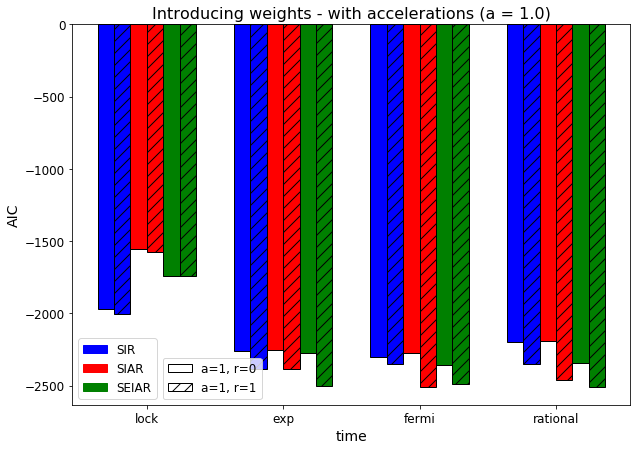

In [10]:
plt.figure(figsize=(10,7))
    
width = 0.12
x = np.arange(len(times)) - width/2
    
for j, time in enumerate(times):
    plt.bar( j-3*width, SIR[ (SIR.a==1.0) & (SIR.r==0.0) & (SIR.time==time) ].AIC, width = width,
               color = 'blue', edgecolor = 'black')
    plt.bar( j-width, SIAR[ (SIAR.a==1.0) & (SIAR.r==0.0) & (SIAR.time==time) ].AIC, width = width,
               color = 'red', edgecolor = 'black')
    plt.bar( j+width, SEIAR[ (SEIAR.a==1.0) & (SEIAR.r==0.0) & (SEIAR.time==time) ].AIC, width = width,
               color = 'green', edgecolor = 'black')
    
    plt.bar( j-2*width, SIR[ (SIR.a==1.0) & (SIR.r==1.0) & (SIR.time==time) ].AIC, width = width,
               color = 'blue', edgecolor = 'black', hatch='//')
    plt.bar( j, SIAR[ (SIAR.a==1.0) & (SIAR.r==1.0) & (SIAR.time==time) ].AIC, width = width,
               color = 'red', edgecolor = 'black', hatch='//')
    plt.bar( j+2*width, SEIAR[ (SEIAR.a==1.0) & (SEIAR.r==1.0) & (SEIAR.time==time) ].AIC, width = width,
               color = 'green', edgecolor = 'black', hatch='//')
        
    #plt.legend(labels=['SIR', 'SIAR', 'SEIAR'], prop={'size': 12} )


blue_patch = mpatches.Patch(color='blue', label='SIR')
red_patch = mpatches.Patch(color='red', label='SIAR')
green_patch = mpatches.Patch(color='green', label='SEIAR') 
first_legend = plt.legend(handles=[blue_patch, red_patch, green_patch], loc='lower left', prop={'size': 12} )
ax = plt.gca().add_artist(first_legend)

hatches = ['', '//']

handl = []
handl.append(mpatches.Patch(fc='white', ec='black', label='a=1, r=0', hatch=hatches[0]))
handl.append(mpatches.Patch(fc='white', ec='black', label='a=1, r=1', hatch=hatches[1]))
plt.legend(bbox_to_anchor=(0.35,0.14), handles=handl, prop={'size': 12})


plt.xticks(x, labels=times)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('time', size=14)
plt.ylabel('AIC', size=14)
plt.title('Introducing weights - with accelerations (a = 1.0)', size=16)
    
plt.show()

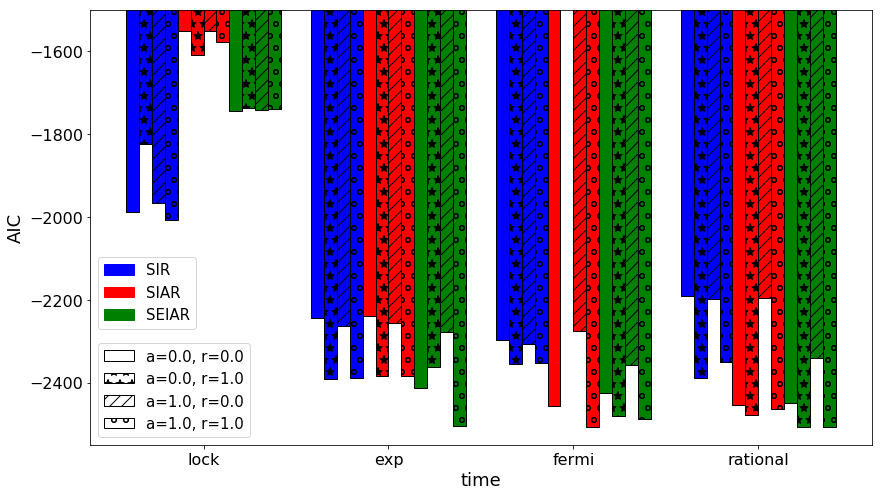

In [12]:
SIR_c = pd.read_csv('params/SIR_models.csv', sep=',')
SIAR_c = pd.read_csv('params/SIAR_models.csv', sep=',')
SEIAR_c = pd.read_csv('params/SEIAR_models.csv', sep=',')


SIR = SIR_c[SIR_c.country=='Italy']
SIAR = SIAR_c[SIAR_c.country=='Italy']
SEIAR = SEIAR_c[SEIAR_c.country=='Italy']

plt.figure(figsize=(14,8))
    
width = 0.07
x = np.arange(len(times)) - width/2

n = len(times)
m = len(weights)

hatches = ['', '*', '//', 'o']

for j, time in enumerate(times):
    for k, w in enumerate(weights):
        
        plt.bar( j+(-6+k)*width, SIR[ (SIR.a==w[0]) & (SIR.r==w[1]) & (SIR.time==time) ].AIC, width = width,
                   color = 'blue', edgecolor = 'black', hatch=hatches[k])
        plt.bar( j+(-2+k)*width, SIAR[ (SIAR.a==w[0]) & (SIAR.r==w[1]) & (SIAR.time==time) ].AIC, width = width,
                   color = 'red', edgecolor = 'black', hatch=hatches[k])
        plt.bar( j+(+2+k)*width, SEIAR[ (SEIAR.a==w[0]) & (SEIAR.r==w[1]) & (SEIAR.time==time) ].AIC, width = width,
                   color = 'green', edgecolor = 'black', hatch=hatches[k])
        
        
blue_patch = mpatches.Patch(color='blue', label='SIR')
red_patch = mpatches.Patch(color='red', label='SIAR')
green_patch = mpatches.Patch(color='green', label='SEIAR')
        
first_legend = plt.legend(bbox_to_anchor=(0,0.35), handles=[blue_patch, red_patch, green_patch], loc='center left', prop={'size': 15} )
ax = plt.gca().add_artist(first_legend)

handl = []
for i, hatch in enumerate(hatches):
    handl.append(mpatches.Patch(fc='white', ec='black', label='a='+str(weights[i][0])+', r='+str(weights[i][1]), hatch=hatch))

plt.legend(handles=handl, prop={'size': 15})
    
plt.xticks(x, labels=times)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel('time', size=18)
plt.ylabel('AIC', size=18)
plt.ylim([-2550, -1500])
    
plt.show()

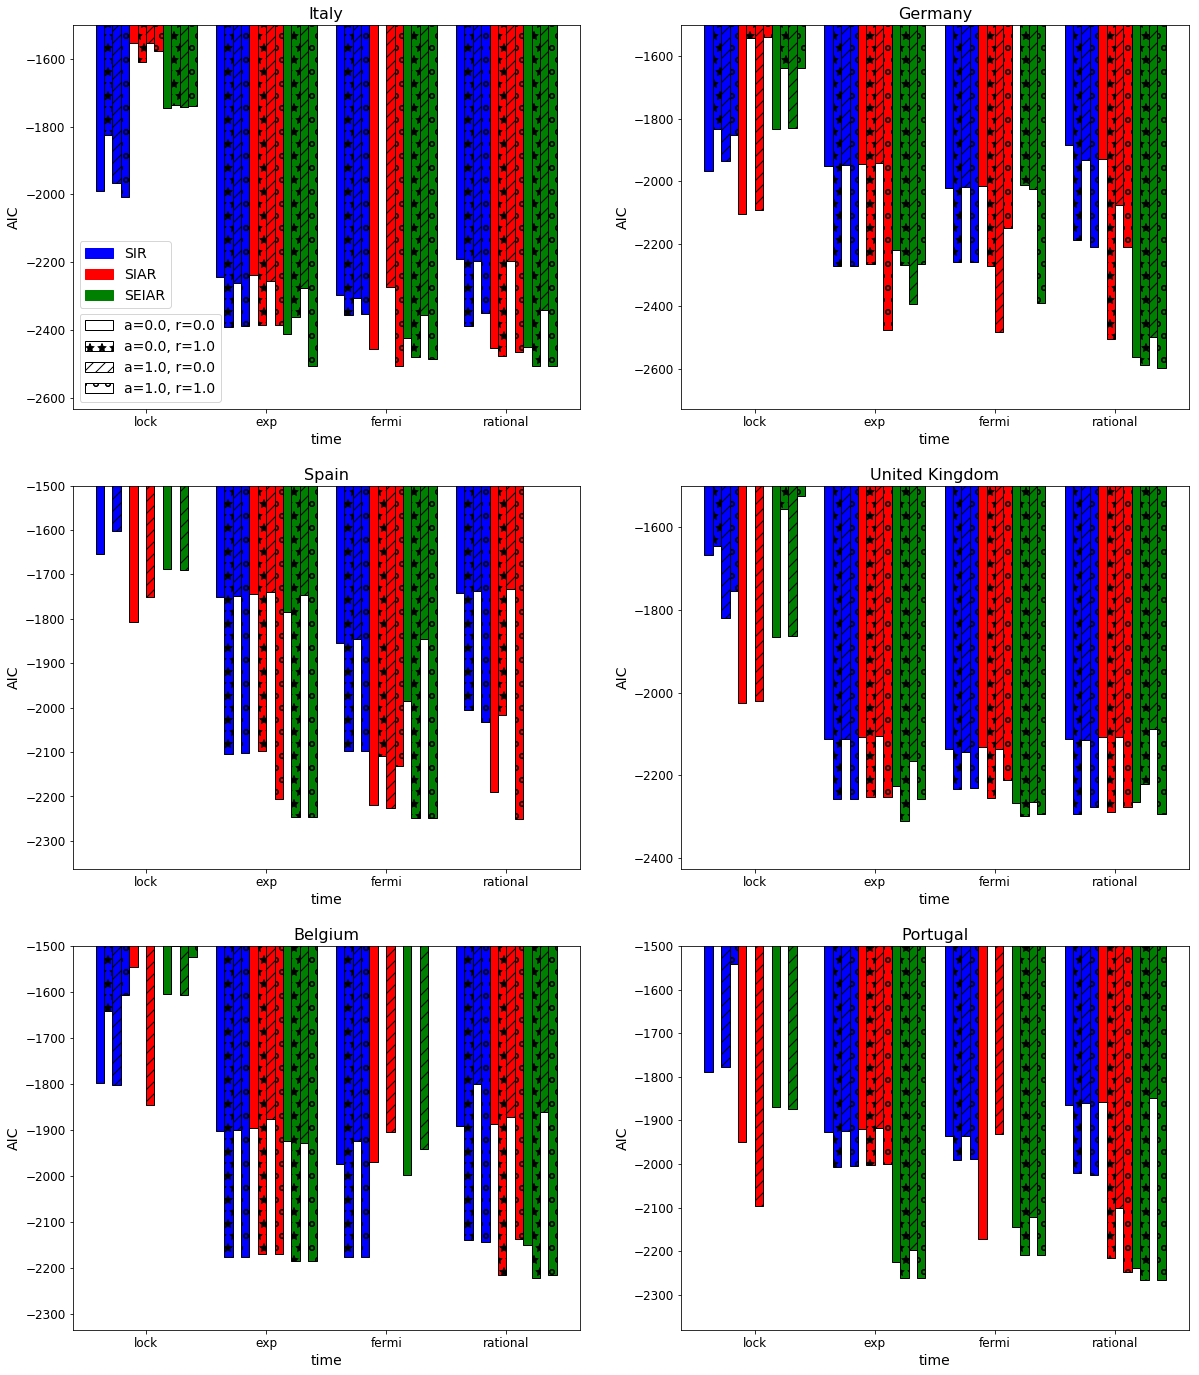

In [13]:
plt.figure(figsize=(20,24))

for i, country in enumerate(countries):
    plt.subplot(3, 2, i+1)
    
    SIR = SIR_c[SIR_c.country==country]
    SIAR = SIAR_c[SIAR_c.country==country]
    SEIAR = SEIAR_c[SEIAR_c.country==country]
    
    width = 0.07
    x = np.arange(len(times)) - width/2

    n = len(times)
    m = len(weights)

    hatches = ['', '*', '//', 'o']

    for j, time in enumerate(times):
        for k, w in enumerate(weights):

            plt.bar( j+(-6+k)*width, SIR[ (SIR.a==w[0]) & (SIR.r==w[1]) & (SIR.time==time) ].AIC, width = width,
                       color = 'blue', edgecolor = 'black', hatch=hatches[k])
            plt.bar( j+(-2+k)*width, SIAR[ (SIAR.a==w[0]) & (SIAR.r==w[1]) & (SIAR.time==time) ].AIC, width = width,
                       color = 'red', edgecolor = 'black', hatch=hatches[k])
            plt.bar( j+(+2+k)*width, SEIAR[ (SEIAR.a==w[0]) & (SEIAR.r==w[1]) & (SEIAR.time==time) ].AIC, width = width,
                       color = 'green', edgecolor = 'black', hatch=hatches[k])

    if i==0:
        blue_patch = mpatches.Patch(color='blue', label='SIR')
        red_patch = mpatches.Patch(color='red', label='SIAR')
        green_patch = mpatches.Patch(color='green', label='SEIAR')

        first_legend = plt.legend(bbox_to_anchor=(0,0.35), handles=[blue_patch, red_patch, green_patch], loc='center left', prop={'size': 14} )
        ax = plt.gca().add_artist(first_legend)

        handl = []
        for i, hatch in enumerate(hatches):
            handl.append(mpatches.Patch(fc='white', ec='black', label='a='+str(weights[i][0])+', r='+str(weights[i][1]), hatch=hatch))

        plt.legend(handles=handl, prop={'size': 14})

    plt.xticks(x, labels=times)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.xlabel('time', size=14)
    plt.ylabel('AIC', size=14)
    #plt.ylim([-2550, -1500])
    plt.ylim(top=-1500)
    plt.title(country, size=16)
#plt.suptitle('AIC-A comparison', y=0.93, size=20) 
plt.show()